### Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("titanic.csv")
df= pd.DataFrame(data)
df.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df["PassengerId"].duplicated().sum()

0

In [6]:
df=df.drop(["PassengerId","Cabin","Ticket","Fare"], axis = 1)
df.head(n=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [8]:
df[["Pclass","SibSp","Parch"]] = df[["Pclass","SibSp","Parch"]].astype(np.int8)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int8   
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int8   
 6   Parch     891 non-null    int8   
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(1), int8(3), object(3)
memory usage: 37.5+ KB


In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [11]:
df["Age"]= df["Age"].fillna((df["Age"].mean()))
print(df["Age"].sample(n=10))
print("\n")
print(df["Age"].tail(n=10))

404    20.000000
814    30.500000
172     1.000000
531    29.699118
550    17.000000
63      4.000000
379    19.000000
205     2.000000
230    35.000000
865    42.000000
Name: Age, dtype: float64


881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64


In [12]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
df["Embarked"]=df["Embarked"].fillna("S")
df["Embarked"].tail(n=10)

881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int8   
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int8   
 6   Parch     891 non-null    int8   
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(1), int8(3), object(3)
memory usage: 37.5+ KB


In [15]:
df["Survived"].nunique()

2

In [16]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [17]:
df=df.replace({"Survived": {0:"Not survived",1:"Survived"},"Sex": {"male":"Male","female":"Female"}
               ,"Embarked":{"C":"Cherbourg","Q":"Queenstown","S":"Southampton"}})
df.head(n=5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,Not survived,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,Southampton
1,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,Cherbourg
2,Survived,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,Southampton
3,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,Southampton
4,Not survived,3,"Allen, Mr. William Henry",Male,35.0,0,0,Southampton


In [18]:
df["Name"].apply(lambda x: (',' and '.' )in x ).all()

True

In [19]:
df["Name"]=df["Name"].apply(lambda x:x.split(',')[1].split('.')[0])
df["Name"].head(n=20)

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
Name: Name, dtype: object

In [20]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,Not survived,3,Mr,Male,22.000000,1,0,Southampton
1,Survived,1,Mrs,Female,38.000000,1,0,Cherbourg
2,Survived,3,Miss,Female,26.000000,0,0,Southampton
3,Survived,1,Mrs,Female,35.000000,1,0,Southampton
4,Not survived,3,Mr,Male,35.000000,0,0,Southampton
...,...,...,...,...,...,...,...,...
886,Not survived,2,Rev,Male,27.000000,0,0,Southampton
887,Survived,1,Miss,Female,19.000000,0,0,Southampton
888,Not survived,3,Miss,Female,29.699118,1,2,Southampton
889,Survived,1,Mr,Male,26.000000,0,0,Cherbourg


In [21]:
df["Name"].nunique()

17

In [22]:
df["Name"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [23]:
df["Name"].value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [24]:
df["Name"]= df["Name"].replace({"Mme":"Mrs", "Ms": "Mrs", "Lady": "Mrs", "the Countess": "Mrs","Dr":"Rev","Major":"Rev","Sir":"Mr","Capt": "Col","Don":"Master","Mlle": "Miss","Jonkheer":"Master", "the Mrs":"Mrs"},regex=True)

df["Name"]= df["Name"].replace({"Col": "Colonel"}, regex = True)

In [25]:
df["Name"].nunique()

6

In [26]:
df["Name"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Rev', ' Colonel'],
      dtype=object)

In [27]:
df["Name"].value_counts()

Name
Mr         518
Miss       184
Mrs        129
Master      42
Rev         15
Colonel      3
Name: count, dtype: int64

In [28]:
print(df.head(n=5))
print("\n")
print(df.info())

       Survived  Pclass   Name     Sex   Age  SibSp  Parch     Embarked
0  Not survived       3     Mr    Male  22.0      1      0  Southampton
1      Survived       1    Mrs  Female  38.0      1      0    Cherbourg
2      Survived       3   Miss  Female  26.0      0      0  Southampton
3      Survived       1    Mrs  Female  35.0      1      0  Southampton
4  Not survived       3     Mr    Male  35.0      0      0  Southampton


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int8   
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int8   
 6   Parch     891 non-null    int8   
 7   Embarked  891 non-null    object 
dtypes: float64(1), int8(3), object(4)
memory usage: 37.5+ KB
None


### Data Visualization

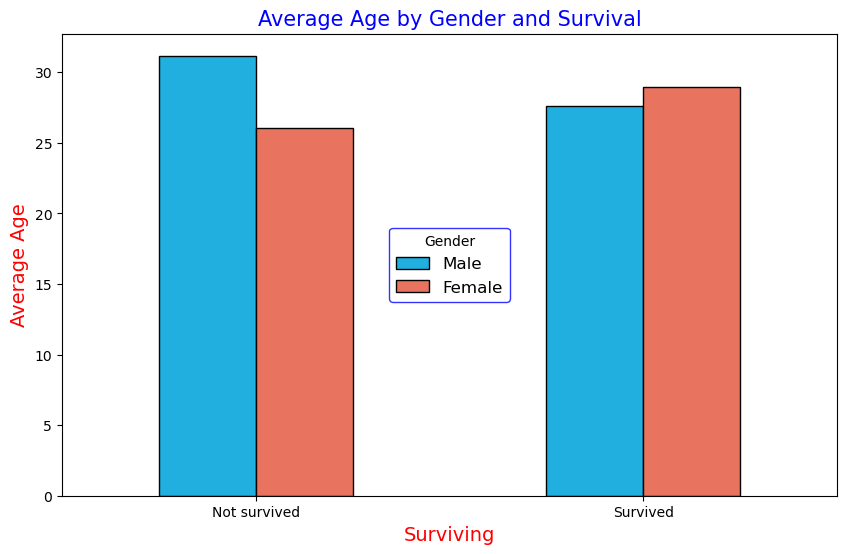

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Survived", y="Age", hue="Sex", estimator = "mean" ,data = df, palette={"Male": "DeepSkyBlue", "Female": "Tomato"}, edgecolor="black", width=0.5,errorbar=None)
plt.title("Average Age by Gender and Survival", fontsize=15, color="blue")
plt.xlabel("Surviving", fontsize=14, color="red")
plt.ylabel("Average Age",fontsize=14,color="red")
plt.legend(title ="Gender", fontsize= 12, edgecolor="blue",facecolor="white",loc='center')

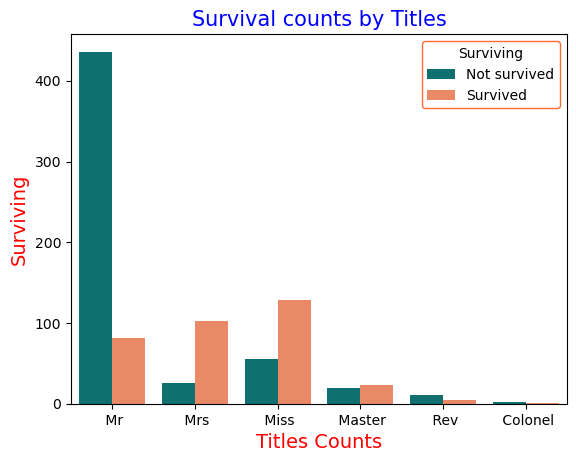

In [31]:
sns.countplot(x='Name',hue='Survived',data=df, palette=("Teal","Coral"))
plt.title("Survival counts by Titles", fontsize=15, color="blue")
plt.xlabel("Titles Counts", fontsize=14, color="red")
plt.ylabel("Surviving",fontsize=14,color="red")
plt.legend(title ="Surviving", fontsize= 10, edgecolor="OrangeRed",facecolor="white",loc='upper right')

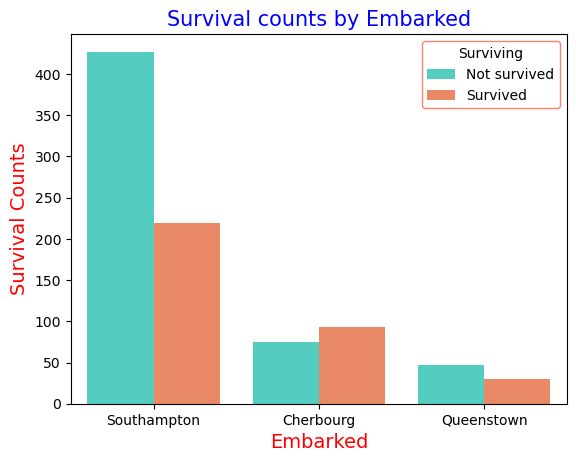

In [32]:
sns.countplot(x='Embarked',hue='Survived',data=df, palette=("Turquoise","Coral"))
plt.title("Survival counts by Embarked", fontsize=15, color="blue")
plt.xlabel("Embarked", fontsize=14, color="red")
plt.ylabel("Survival Counts",fontsize=14,color="red")
plt.legend(title ="Surviving", fontsize= 10, edgecolor="Tomato",facecolor="white",loc='upper right')

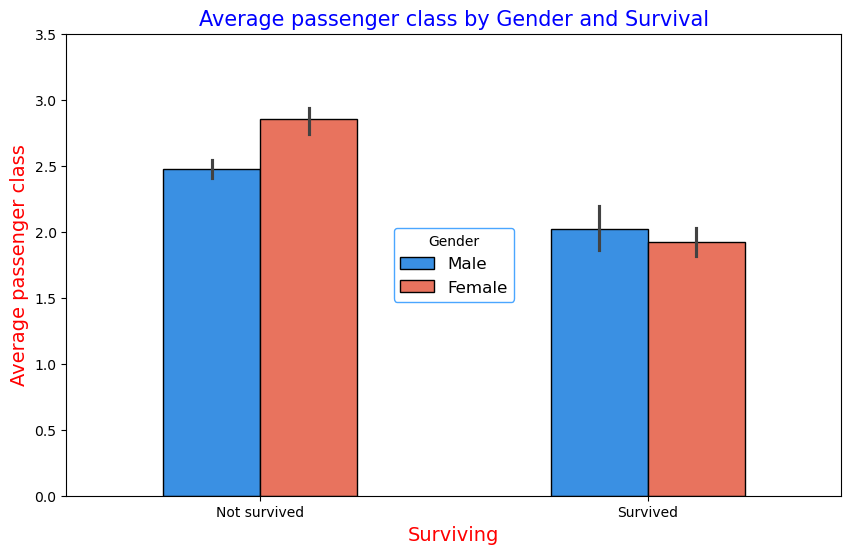

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Survived", y="Pclass", hue="Sex", estimator = "mean" ,data = df, palette={"Male": "DodgerBlue", "Female": "Tomato"}, edgecolor="black", width=0.5)
plt.ylim(0,3.5)
plt.title("Average passenger class by Gender and Survival", fontsize=15, color="blue")
plt.xlabel("Surviving", fontsize=14, color="red")
plt.ylabel("Average passenger class",fontsize=14,color="red")
plt.legend(title ="Gender", fontsize= 12, edgecolor="DodgerBlue",facecolor="white",loc='center')

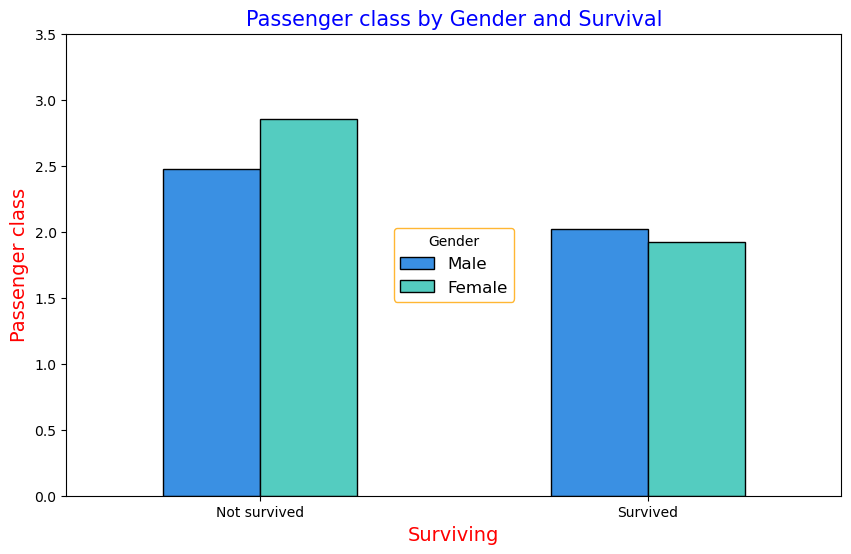

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Survived", y="Pclass", hue="Sex", estimator = "mean",data = df, palette={"Male": "DodgerBlue", "Female": "Turquoise"}, edgecolor="black", width=0.5,errorbar=None)
plt.ylim(0,3.5)
plt.title("Passenger class by Gender and Survival", fontsize=15, color="blue")
plt.xlabel("Surviving", fontsize=14, color="red")
plt.ylabel("Passenger class",fontsize=14,color="red")
plt.legend(title ="Gender", fontsize= 12, edgecolor="orange",facecolor="white",loc='center')

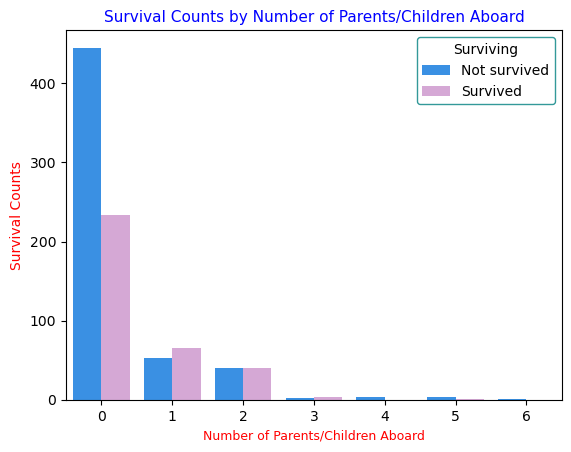

In [35]:
sns.countplot(x='Parch',hue='Survived',data=df, palette=("DodgerBlue","plum"))
plt.title("Survival Counts by Number of Parents/Children Aboard", fontsize=11, color="blue")
plt.xlabel("Number of Parents/Children Aboard", fontsize=9, color="red")
plt.ylabel("Survival Counts", fontsize=10, color="red")
plt.legend(title="Surviving", fontsize=10, edgecolor="teal", facecolor="white", loc='upper right')

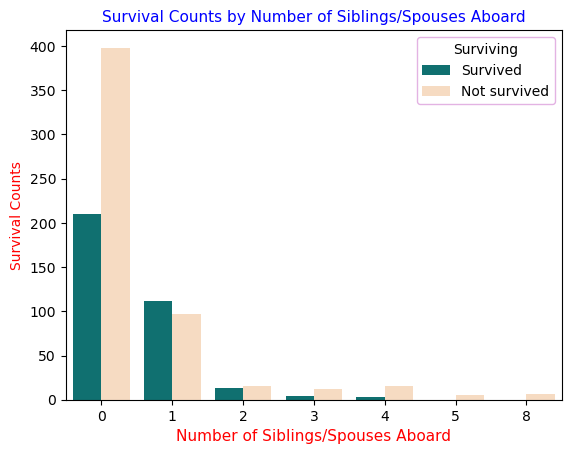

In [36]:
sns.countplot(x='SibSp', hue='Survived', data=df, palette=("teal", "PeachPuff"))
plt.title("Survival Counts by Number of Siblings/Spouses Aboard", fontsize=11, color="blue")
plt.xlabel("Number of Siblings/Spouses Aboard", fontsize=11, color="red")
plt.ylabel("Survival Counts", fontsize=10, color="red")
plt.legend(title="Surviving", fontsize=10, edgecolor="plum", facecolor="white", loc='upper right')
plt.show()
